
# Relatório Parcial : Maratona de Filmes

Aluno: Davi Reis Vieira de Souza

## Introdução

Queremos passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

**Entrada**: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

**Saída**: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

Abaixo, temos o seguinte exemplo de *input*:

```txt
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
```

Como ler esse arquivo?

- A primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
- a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
- da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.

## Objetivo

O objetivo do projeto é conseguir agrupar o máximo de filmes que podem ser assistidos em um dia conforme as instruções e as instruções dadas.

## Heurística Gulosa e Aleatorização

### Heuristica Gulosa

A heurística gulosa é um algoritmo que resolve problemas de otimização tentando encontrar a melhor solução possível em cada etapa, sem olhar para o resultado final. No caso do problema da *Maratona de Filmes*, a heurística gulosa funciona da seguinte forma:

- Ordena os filmes em ordem crescente do horário de fim;
- Aplicaam-se as restrições e escolhe-se o primeiro filme que as possuiam de acordo com os horários de fim;
- Quando não houver mais espaço livre na *Maratona*, a heurística termina.

A heurística gulosa é usada para encontrar soluções ótimas em problemas de otimização, mas nem sempre garante a melhor solução. No entanto, é útil para problemas grandes em que encontrar a solução ótima é difícil. O algoritmo pode ser modificado e combinado com outras técnicas para melhorar a qualidade da solução encontrada.





### Heuristica Gulosa com Aleatorização

Essa implementação consiste na adaptação da heurística gulosa de nosso projeto. A proposta é que modifiquemos a heurística gulosa de modo que ao longo da seleção de um filme, hajam 25% de chance de pegar outro filme qualquer que respeite o mesmo horário analisado. Isso fará com que a heurística tenha um pouco mais de exploration e os resultados sejam melhores, pois a heurística não ficará presa em um ótimo local.

Além disso, como ela possui o caráter aleatório, ela pode ser usada para encontrar soluções diferentes para o mesmo problema, o que pode ser útil para encontrar soluções melhores.

## O Código

### Heuristica Gulosa

Abaixo, a explicação por partes principais do código:

#### Bibliotecas

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>
```

São as bibliotecas padrões da linguagem C++. `iostream` é para entrada e saída de dados, ``vector`` é para armazenar listas de objetos, ``algorithm`` é para algoritmos de ordenação e outras operações em contêineres, ``iomanip`` é para manipulação de fluxos de saída e ``bitset`` é para manipulação de bits.

#### Estruturas de Dados

```cpp
struct Filme {
    int id;
    int inicio;
    int fim;
    int categoria;
    std::bitset<24> horario;
};

struct Categoria {
    int id;
    int quantidade;
};

struct Maratona {
    std::bitset<24> disponibilidade;
    std::vector<Filme> filmes;
};
```

São as estruturas de dados utilizadas no código. A estrutura ``Filme`` armazena as informações de cada filme, como id, horário de início e fim e categoria. A estrutura ``Categoria`` armazena o id e a quantidade de filmes de cada categoria. A estrutura ``Maratona`` armazena a disponibilidade de horários da maratona e os filmes selecionados.

#### Funções Auxiliares

```cpp
std::bitset<24> gera_horario(int inicio, int fim) {
    std::bitset<24> horario;

    if (inicio == fim) {
        horario.set(inicio);
        return horario;
    }
    
    for (int i = inicio; i < fim; i++) {
        horario.set(i);
    }

    return horario;
}

bool compara_filme(Filme a, Filme b) {
    return a.fim < b.fim;
}
```

A função ``gera_horario`` recebe o horário de início e fim de um filme e retorna um std::bitset<24> com os bits correspondentes ao horário ocupado pelo filme. A função ``compara_filme`` é utilizada para ordenar os filmes de acordo com o horário de fim, em ordem crescente.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // lê o número de filmes e de categorias
    vector<Filme> filmes(n); // cria um vetor de filmes com tamanho n
    vector<Categoria> categorias(m); // cria um vetor de categorias com tamanho m
    Maratona maratona; // cria uma maratona

    // Lê a quantidade de filmes de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Se o horário de início é maior que o horário de fim,
        // significa que o filme se estende até o dia seguinte
        if (inicio > fim) {
            if (fim == 0) {
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue; // Ignora filmes com horários inválidos
            } else {
                continue; // Ignora filmes com horários inválidos
            }
        }

        // Cria um filme com as informações lidas
        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        // Adiciona o filme ao vetor de filmes
        filmes.push_back(filme);
    }

    // Ordena os filmes por ordem crescente de horário de fim
    sort(filmes.begin(), filmes.end(), compara_filme);

    // Chama a função que implementa a heurística gulosa para encontrar a programação da maratona
    heuristica_gulosa(filmes, categorias, maratona);

    return 0;
}
```

#### Heurística Gulosa

```cpp
void heuristica_gulosa(vector<Filme> &filmes, vector<Categoria> &categorias, Maratona &maratona) {
    int maximo = 0;
    int size_of_filmes = filmes.size();

    for (int i = 0; i < size_of_filmes; i++) {
        Filme filme = filmes[i];
        int categoria = filme.categoria;
        std::bitset<24> horario = filme.horario;

        if (categorias[categoria - 1].quantidade == 0) {
            continue;
        }

        if (maratona.disponibilidade == 0) {
            maratona.disponibilidade = horario;
            maratona.filmes.push_back(filme);
            categorias[categoria - 1].quantidade--;
            maximo++;
        } else {
            if ((maratona.disponibilidade & horario) == 0) {
                maratona.disponibilidade |= horario;
                maratona.filmes.push_back(filme);
                categorias[categoria - 1].quantidade--;
                maximo++;
            }
        }
    }

    cout << maximo << endl;

    for (int i = 0; i < maximo; i++) {
        cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
    }
}
```

A função ``heuristica_gulosa`` implementa uma heurística gulosa para encontrar a maior quantidade possível de filmes em uma maratona de acordo com a disponibilidade e a categoria de cada filme.

A função recebe três argumentos: ``filmes``, um vetor contendo todos os filmes a serem considerados na maratona; ``categorias``, um vetor de estrutura ``Categoria`` que contém informações sobre a quantidade de filmes que podem ser selecionados para cada categoria; e ``maratona``, uma estrutura que contém um vetor de filmes selecionados e uma ``bitset`` representando a disponibilidade de horários na maratona.

A função começa definindo a variável ``maximo`` como 0, que será atualizada com a quantidade máxima de filmes selecionados para a maratona. Em seguida, um loop é executado para cada filme em ``filmes``.

Para cada filme, a função verifica se a categoria desse filme já teve a quantidade máxima de filmes selecionados, caso tenha, o filme é pulado e o loop continua. Caso contrário, a função verifica se a disponibilidade de horários da maratona é 0 (ou seja, nenhum filme foi selecionado até agora). Se for esse o caso, a disponibilidade de horários é atualizada com a disponibilidade do horário do filme e o filme é adicionado ao vetor de filmes selecionados na maratona. A quantidade de filmes da categoria correspondente é decrementada e a variável ``maximo`` é incrementada.

Caso a disponibilidade de horários da maratona já tenha sido definida, a função verifica se a disponibilidade do horário do filme selecionado não entra em conflito com a disponibilidade dos horários dos filmes já selecionados. Isso é feito usando a operação bit a bit "AND" entre as disponibilidades de horário do filme e da maratona. Se o resultado for 0, significa que os horários não entram em conflito e o filme pode ser adicionado. Caso contrário, o filme é pulado.

Por fim, a função imprime o valor de ``maximo``, que representa a quantidade de filmes selecionados para a maratona, e imprime as informações dos filmes selecionados: seu id, horário de início e horário de fim.

## Aleatoriedade

O código da estratégia de Aleatorização se diferencia somente na função ``main`` e o uso da nova função ``aleatoriedade``.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // Lê o número de filmes (n) e o número de categorias (m)

    vector<Filme> filmes; // Vetor que armazenará os filmes
    vector<Categoria> categorias(m); // Vetor que armazenará as categorias
    Maratona maratona; // Objeto que representará a maratona

    // Lê a quantidade de filmes para cada categoria e inicializa o id de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes e gera a lista de filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Trata casos em que o horário do filme é inválido
        if (inicio > fim) {
            if (fim == 0){
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue;
            } else {
                continue;
            }
        }

        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        filmes.push_back(filme);
    }

    sort(filmes.begin(), filmes.end(), compara_filme); // Ordena os filmes por horário de término

    int size_of_filmes = filmes.size();

    map<int, vector<Filme>> filmes_por_horario; // Mapa que armazenará os filmes por horário

    // Separa os filmes por horário de término
    for (int i = 0; i < size_of_filmes; i++) {
        filmes_por_horario[filmes[i].fim].push_back(filmes[i]);
    }

    // Realiza a escolha aleatória dos filmes para a maratona
    aleatoriedade(categorias, maratona, filmes_por_horario);

    return 0;
}
```

#### Aleatoriedade

```cpp
void aleatoriedade(vector<Categoria> &categorias, Maratona &maratona, map<int, vector<Filme>> filmes_por_horario){
    unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
    std::default_random_engine generator (seed);
    std::binomial_distribution<int> distribution (1, 0.75);
    distribution(generator);

    bitset<24> mochila_cheia(0xFFFFFF);

    for (int i = 1; i <= 24; i++){
        if (maratona.disponibilidade == mochila_cheia){
            break;
        }

        if (filmes_por_horario[i].size() == 0){
            continue;
        }

        Filme filme_escolhido;

        srand(time(NULL));
        if (distribution(generator)){
            for (int j = 0; j < static_cast<int>(filmes_por_horario[i].size()); j++){
                if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
                    filme_escolhido = filmes_por_horario[i][j];
                    break;
                }

                filme_escolhido.id = -1;
            }
        } else {
            vector<Filme> filmes_disponiveis_no_horario;

            for (int j = 1; j < static_cast<int>(filmes_por_horario[i].size()); j++){
                if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
                    filmes_disponiveis_no_horario.push_back(filmes_por_horario[i][j]);
                }
            }

            if (filmes_disponiveis_no_horario.size() == 0){
                continue;
            }

            filme_escolhido = filmes_disponiveis_no_horario[rand() % filmes_disponiveis_no_horario.size()];
        }

        if (filme_escolhido.id == -1){
            continue;
        }

        maratona.disponibilidade |= filme_escolhido.horario;
        maratona.filmes.push_back(filme_escolhido);
        categorias[filme_escolhido.categoria - 1].quantidade--;        
    }

    cout << maratona.filmes.size() << endl;

    for (int i = 0; i < static_cast<int>(maratona.filmes.size()); i++){
        cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
    }

    cout << endl;
}
```

A função ``aleatoriedade`` é responsável por gerar uma maratona aleatória de filmes que se encaixam dentro dos horários disponíveis e ainda respeitam a quantidade de filmes por categoria.

Primeiramente, a função gera uma seed aleatória baseada no tempo atual para ser usada no gerador de números aleatórios. Em seguida, é criada uma distribuição binomial com probabilidade de sucesso de 0.75, que será usada para determinar se um filme disponível no horário será escolhido ou não.

A partir daí, é feito um loop pelos 24 horários possíveis. Se a maratona já estiver cheia, o loop é interrompido. Se não houver filmes disponíveis no horário atual, o loop segue para o próximo horário. 


A função utiliza a distribuição binomial criada anteriormente para escolher qual método de escolha será utilizado. Se o número aleatório gerado for 0, a função escolhe um filme aleatório dentre os disponíveis no horário atual. Caso contrário, a função escolhe o filme com o menor horário de término dentre os disponíveis no horário atual.

Ele antes verifica se algum filme foi selecionado.

Após isso, ele é adicionado à lista de filmes da maratona. A quantidade de filmes da sua categoria é reduzida em 1. A disponibilidade de horários da maratona é atualizada com a disponibilidade do filme selecionado.

Por fim, a função imprime a quantidade de filmes na maratona, seguida da lista de filmes, com seus respectivos IDs, horários de início e fim e categoria.

## Arquivo Output

O arquivo de saída é gerado pelo programa e contém a:

- Quantidade de filmes na maratona
- Lista de filmes, com seus respectivos:
    - IDs
    - Horário de início
    - Horário de fim
    - Categoria

Exemplo de arquivo de saída:

```
20
474 0 1 20
99 1 2 70
184 2 4 12
581 4 5 52
92 5 6 9
849 6 7 18
746 7 8 33
319 8 9 3
179 9 10 74
207 10 11 57
757 11 12 18
618 13 13 17
628 14 15 36
358 16 16 87
351 17 18 35
304 18 19 87
794 19 20 44
51 20 21 54
360 22 22 37
541 23 24 39
```

Desta forma, é possível facilmente pegar os dados de saída e gerar um arquivo de texto com a lista de filmes da maratona e, com isso, gerar gráficos a partir dos dados, como veremos mais a frente.

## Valgrind

Utilizando a ferramenta Valgrind, é possível analisar o programa e verificar se ele possui algum erro de memória. Além disso, é possível observar possíveis otimizações no código que podem ser feitas para melhorar a performance do programa.

Para o contexto deste Projeto, utilizaremos esta ferramenta para comparar a performace de cada estratégia de geração de maratonas.

Antes de continuar, é importante instalar a ferramenta Valgrind. Para isso, basta executar o seguinte comando no terminal:


In [1]:
!sudo apt-get install valgrind

[sudo] password for user: 


### Heurística Gulosa

In [5]:
!valgrind --tool=callgrind --vgdb=no ./gulosa < inputs/input-10k.txt  > gulosa_output_valgrind.txt

==945824== Callgrind, a call-graph generating cache profiler
==945824== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==945824== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==945824== Command: ./gulosa
==945824== 
==945824== For interactive control, run 'callgrind_control -h'.
==945824== 
==945824== Events    : Ir
==945824== Collected : 44971779
==945824== 
==945824== I   refs:      44,971,779


In [ ]:
!callgrind_annotate callgrind.out.945824 gulosa.cpp 

```txt
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.945824' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 9240846
Trigger: Program termination
Profiled target:  ./gulosa (PID 945824, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
44,971,779  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,078,213  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
5,462,182  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,225,106  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,557,984  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
2,528,568  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,001,366  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,695,186  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
1,655,610  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,327,630  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
1,211,735  gulosa.cpp:compara_filme(Filme, Filme) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
1,173,978  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,047,080  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
1,032,102  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2 [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  964,256  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  664,378  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  648,680  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  606,923  ???:0x00000000048e9130 [???]
  572,527  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  563,233  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  542,688  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  541,836  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  451,950  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  444,753  ???:0x00000000048e6880 [???]
  304,196  gulosa.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<Categoria, std::allocator<Categoria> >&, Maratona&) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  274,548  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  270,802  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  269,683  /usr/include/c++/9/bits/stl_algo.h:main
  228,053  gulosa.cpp:main [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  197,806  /usr/include/c++/9/bitset:gera_horario(int, int)
  182,238  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  179,802  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  175,392  /usr/include/c++/9/bits/predefined_ops.h:main
  162,635  gulosa.cpp:gera_horario(int, int) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  146,579  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  118,149  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   90,419  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   90,390  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   83,011  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   72,727  /usr/include/c++/9/bits/stl_vector.h:main
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   70,287  /usr/include/c++/9/bits/stl_uninitialized.h:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
   60,623  ???:0x00000000048e64f0 [???]
   60,271  ???:0x00000000048e9080 [???]
   60,266  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   60,215  ???:0x00000000048e7530 [???]
   60,209  ???:0x00000000048e6f30 [???]
   60,209  ???:0x00000000048e86a0 [???]
   60,204  ???:0x0000000000109170 [???]
   60,204  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   46,879  /usr/include/c++/9/bits/stl_algo.h:void std::__move_median_to_first<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
   40,001  /usr/include/c++/9/bits/stl_uninitialized.h:main

--------------------------------------------------------------------------------
-- User-annotated source: gulosa.cpp
--------------------------------------------------------------------------------
Ir      

-- line 19 ----------------------------------------
      .      int quantidade;
      .  };
      .  
      .  struct Maratona {
      .      std::bitset<24> disponibilidade;
      .      std::vector<Filme> filmes;
      .  };
      .  
242,347  bool compara_filme(Filme a, Filme b) {
727,041      return a.fim < b.fim;
242,347  }
      .  
 18,172  std::bitset<24> gera_horario(int inicio, int fim) {
 18,042      std::bitset<24> horario;
      .  
 18,172      if (inicio == fim) {
     65          horario.set(inicio);
    195          return horario;
      .      }
      .      
 62,885      for (int i = inicio; i < fim; i++) {
 26,932          horario.set(i);
      .      }
      .  
      .      return horario;
 18,172  }
      .  
     13  void heuristica_gulosa(vector<Filme> &filmes, vector<Categoria> &categorias, Maratona &maratona) {
      1      int maximo = 0;
      1      int size_of_filmes = filmes.size();
      .  
 76,326      for (int i = 0; i < size_of_filmes; i++) {
 76,344          Filme filme = filmes[i];
      .          int categoria = filme.categoria;
      .          std::bitset<24> horario = filme.horario;
      .  
114,516          if (categorias[categoria - 1].quantidade == 0) {
      .              continue;
      .          }
      .  
 18,172          if (maratona.disponibilidade == 0) {
      .              maratona.disponibilidade = horario;
      .              maratona.filmes.push_back(filme);
      .              categorias[categoria - 1].quantidade--;
      .              maximo++;
      .          } else {
 18,170              if ((maratona.disponibilidade & horario) == 0) {
      .                  maratona.disponibilidade |= horario;
      6                  maratona.filmes.push_back(filme);
     72                  categorias[categoria - 1].quantidade--;
     24                  maximo++;
      .              }
      .          }
      .      }
      .  
      4      cout << maximo << endl;
  7,298  => ???:0x0000000000109240 (1x)
      .  
     56      for (int i = 0; i < maximo; i++) {
    480          cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
 40,037  => ???:0x0000000000109240 (96x)
      .      }
     11  }
      .  
     11  int main() {
      .      int n, m;
      6      cin >> n >> m;
  9,051  => ???:0x0000000000109170 (2x)
      1      vector<Filme> filmes(n);
      1      vector<Categoria> categorias(m);
      .      Maratona maratona;
      .      
    305      for (int i = 0; i < m; i++) {
    301          cin >> categorias[i].quantidade;
121,283  => ???:0x0000000000109170 (100x)
    300          categorias[i].id = i + 1;
      .      }
      .  
 20,005      for (int i = 0; i < n; i++) {
      .          int inicio, fim, categoria;
 90,001          cin >> inicio >> fim >> categoria;
34,747,066  => ???:0x0000000000109170 (30,000x)
      .  
 50,000          if (inicio > fim) {
  2,666              if (fim == 0){
    838                  fim = 24;
      .              } else if (inicio == -1 || fim == -1) {
      .                  continue;
      .              } else {
      .                  continue;
      .              }
      .          }
      .  
      .          Filme filme;
  9,086          filme.id = i + 1;
  9,086          filme.inicio = inicio;
  9,086          filme.fim = fim;
 18,172          filme.categoria = categoria;
 18,172          filme.horario = gera_horario(inicio, fim);
360,441  => gulosa.cpp:gera_horario(int, int) (9,086x)
      .  
      .          filmes.push_back(filme);
      .      }
      .  
      .      sort(filmes.begin(), filmes.end(), compara_filme);
      .  
      4      heuristica_gulosa(filmes, categorias, maratona);
427,127  => gulosa.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<Categoria, std::allocator<Categoria> >&, Maratona&) (1x)
      .  
      .      return 0;
      .  
     15  }

--------------------------------------------------------------------------------
Ir        
--------------------------------------------------------------------------------
1,906,622  events annotated
```

### Aleatoriedade 

In [24]:
!valgrind --tool=callgrind --vgdb=no ./aleatoriedade < inputs/input-10k.txt  > aleatoriedade_output_valgrind.txt

==956164== Callgrind, a call-graph generating cache profiler
==956164== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==956164== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==956164== Command: ./aleatoriedade
==956164== 
==956164== For interactive control, run 'callgrind_control -h'.
==956164== 
==956164== Events    : Ir
==956164== Collected : 42245947
==956164== 
==956164== I   refs:      42,245,947


In [ ]:
!callgrind_annotate callgrind.out.956164 aleatoriedade.cpp 

```txt
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.956164' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 8990130
Trigger: Program termination
Profiled target:  ./aleatoriedade (PID 956164, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatoriedade.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
42,245,947  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,078,213  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
5,462,182  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,225,106  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,557,984  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
2,528,568  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,001,366  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,655,610  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,173,978  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,052,479  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  964,224  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  664,202  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  661,862  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
  648,680  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  606,923  ???:0x00000000048e9130 [???]
  572,508  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  572,301  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  542,660  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  541,836  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  527,435  aleatoriedade.cpp:compara_filme(Filme, Filme) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  508,020  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
  451,935  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  444,753  ???:0x00000000048e6880 [???]
  404,742  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2 [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  297,429  /usr/include/c++/9/bits/stl_tree.h:main
  283,539  aleatoriedade.cpp:main [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  275,569  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  270,490  /usr/include/c++/9/bits/stl_tree.h:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >)
  197,806  /usr/include/c++/9/bitset:gera_horario(int, int)
  197,476  /usr/include/c++/9/bits/stl_uninitialized.h:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
  182,190  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  177,338  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  163,152  /build/glibc-SzIz7B/glibc-2.31/stdlib/random_r.c:srandom_r [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  162,635  aleatoriedade.cpp:gera_horario(int, int) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  153,769  /usr/include/c++/9/bits/stl_vector.h:main
  129,904  /usr/include/c++/9/bits/stl_algo.h:main
  119,220  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  106,348  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
   90,749  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   90,387  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   90,258  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
   85,980  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   85,707  /usr/include/c++/9/bits/predefined_ops.h:main
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   60,607  ???:0x00000000048e64f0 [???]
   60,269  ???:0x00000000048e9080 [???]
   60,264  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   60,215  ???:0x00000000048e7530 [???]
   60,209  ???:0x00000000048e6f30 [???]
   60,209  ???:0x00000000048e86a0 [???]
   60,204  ???:0x000000000010a2b0 [???]
   60,204  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   50,214  /usr/include/c++/9/bits/stl_uninitialized.h:std::_Rb_tree_node<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >* std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_M_copy<std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_Alloc_node>(std::_Rb_tree_node<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > const*, std::_Rb_tree_node_base*, std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_Alloc_node&)'2
   46,897  /build/glibc-SzIz7B/glibc-2.31/malloc/malloc.c:_int_malloc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   36,755  /usr/include/c++/9/bits/stl_map.h:main
   31,912  /usr/include/c++/9/bits/stl_map.h:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >)
   28,881  /usr/include/c++/9/new:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
   27,973  /build/glibc-SzIz7B/glibc-2.31/malloc/malloc.c:_int_free [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   24,365  aleatoriedade.cpp:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
   20,916  /usr/include/c++/9/bits/stl_algo.h:void std::__move_median_to_first<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]

--------------------------------------------------------------------------------
-- User-annotated source: aleatoriedade.cpp
--------------------------------------------------------------------------------
Ir      

-- line 22 ----------------------------------------
      .      int quantidade;
      .  };
      .  
      .  struct Maratona {
      .      std::bitset<24> disponibilidade;
      .      std::vector<Filme> filmes;
      .  };
      .  
105,487  bool compara_filme(Filme a, Filme b) {
316,461      return a.fim < b.fim;
105,487  }
      .  
 18,172  std::bitset<24> gera_horario(int inicio, int fim) {
 18,042      std::bitset<24> horario;
      .  
 18,172      if (inicio == fim) {
     65          horario.set(inicio);
    195          return horario;
      .      }
      .      
 62,885      for (int i = inicio; i < fim; i++) {
 26,932          horario.set(i);
      .      }
      .  
      .      return horario;
 18,172  }
      .  
      .  
     14  void aleatoriedade(vector<Categoria> &categorias, Maratona &maratona, map<int, vector<Filme>> filmes_por_horario){
      1      unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
    992  => ???:0x000000000010a250 (1x)
      1      std::default_random_engine generator (seed);
      .      std::binomial_distribution<int> distribution (1, 0.75);
      .      distribution(generator);
      .  
      .      bitset<24> mochila_cheia(0xFFFFFF);
      .  
    123      for (int i = 1; i <= 24; i++){
     48          if (maratona.disponibilidade == mochila_cheia){
      .              break;
      .          }
      .  
     72          if (filmes_por_horario[i].size() == 0){
      .              continue;
      .          }
      .  
      .          Filme filme_escolhido;
      .  
     96          srand(time(NULL));
163,608  => ???:0x000000000010a360 (24x)
    192  => ???:0x000000000010a340 (24x)
     92          if (distribution(generator)){
  9,341              for (int j = 0; j < static_cast<int>(filmes_por_horario[i].size()); j++){
  6,438                  if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
    100                      filme_escolhido = filmes_por_horario[i][j];
     20                      break;
      .                  }
      .  
  3,099                  filme_escolhido.id = -1;
      .              }
      .          } else {
      .              vector<Filme> filmes_disponiveis_no_horario;
      .  
  2,485              for (int j = 1; j < static_cast<int>(filmes_por_horario[i].size()); j++){
  1,744                  if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
      .                      filmes_disponiveis_no_horario.push_back(filmes_por_horario[i][j]);
      .                  }
      .              }
      .  
      6              if (filmes_disponiveis_no_horario.size() == 0){
      .                  continue;
      .              }
      .  
     22              filme_escolhido = filmes_disponiveis_no_horario[rand() % filmes_disponiveis_no_horario.size()];
    124  => ???:0x000000000010a270 (2x)
      .          }
      .  
     48          if (filme_escolhido.id == -1){
      .              continue;
      .          }
      .  
      .          maratona.disponibilidade |= filme_escolhido.horario;
      6          maratona.filmes.push_back(filme_escolhido);
     88          categorias[filme_escolhido.categoria - 1].quantidade--;        
      .      }
      .  
      .      cout << maratona.filmes.size() << endl;
      .  
     70      for (int i = 0; i < static_cast<int>(maratona.filmes.size()); i++){
    440          cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
 38,891  => ???:0x000000000010a420 (88x)
      .      }
      .  
      .      cout << endl;
     11  }
      .  
      .  
     11  int main() {
      .      int n, m;
      6      cin >> n >> m;
  9,177  => ???:0x000000000010a2b0 (2x)
      .      vector<Filme> filmes;
      1      vector<Categoria> categorias(m);
      .      Maratona maratona;
      .      
    305      for (int i = 0; i < m; i++) {
    301          cin >> categorias[i].quantidade;
121,283  => ???:0x000000000010a2b0 (100x)
    300          categorias[i].id = i + 1;
      .      }
      .  
 20,005      for (int i = 0; i < n; i++) {
      .          int inicio, fim, categoria;
100,001          cin >> inicio >> fim >> categoria;
34,747,066  => ???:0x000000000010a2b0 (30,000x)
      .  
 50,000          if (inicio > fim) {
  2,666              if (fim == 0){
    838                  fim = 24;
      .              } else if (inicio == -1 || fim == -1) {
      .                  continue;
      .              } else {
      .                  continue;
      .              }
      .          }
      .  
      .          Filme filme;
  9,086          filme.id = i + 1;
  9,086          filme.inicio = inicio;
  9,086          filme.fim = fim;
 18,172          filme.categoria = categoria;
 18,172          filme.horario = gera_horario(inicio, fim);
360,441  => aleatoriedade.cpp:gera_horario(int, int) (9,086x)
      .  
      .          filmes.push_back(filme);
      .      }
      .  
      .      sort(filmes.begin(), filmes.end(), compara_filme);
      .  
      1      int size_of_filmes = filmes.size();
      .  
      .      // for (int i = 0; i < size_of_f    ilmes; i++) {
      .      //     cout << filmes[i].id << " " << filmes[i].inicio << " " << filmes[i].fim << endl;
      .      // }
      .  
      .      map<int, vector<Filme>> filmes_por_horario;
      .      
 45,436      for (int i = 0; i < size_of_filmes; i++) {
     50          filmes_por_horario[filmes[i].fim].push_back(filmes[i]);
      .      }
      .  
      4      aleatoriedade(categorias, maratona, filmes_por_horario);
605,510  => aleatoriedade.cpp:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >) (1x)
      .  
      .      return 0;
      .  
     15  }

--------------------------------------------------------------------------------
Ir      
--------------------------------------------------------------------------------
997,977  events annotated
```

## Análise de desempenho

### Questões gerais sobre o desempenho dos programas

O output do *Valgrind* sugere que ambos os programas tem problemas de vazamento de memória. Esse erro ocorre provavelmente por conta da falta de desalocação de um recurso de memória.

Além disso, para a estratégia aleatória, outras indicações mostram um grande número de operações de alocação e liberação de memória em funções que são chamadas várias vezes no decorrer do programa, como std::chrono::system_clock::now().time_since_epoch().count(), std::default_random_engine generator, std::binomial_distribution<int> distribution e srand(time(NULL)), o que pode ser otimizado se for possível reduzir a quantidade de chamadas dessas funções.

Outra questão que pode ser melhorada é a alocação dinâmica de memória.


### Análise de desempenho do programa aleatório

Temos também, no modelo aleatório, um loop que serva para fazer uma lista apenas com filmes que estão disponíveis no horário atual. Esse consome bastante, apesar de ser um grande trade-off entre ficar apenas procurando um filme de forma aleatória, e é algo que pode ser melhorado, comparando mais casos.

### Análise de desempenho do programa guloso

O programa guloso possui muitas melhorias que podem ser feitas, como a alocação dinâmica de memória, a redução do número de alocações e liberações.

## Comparações com base em dados de desempenho

Antes, é importante realizar o entendimento a seguir:

### Arquivos de Input

Todos os arquivos de input possuem 100 categorias.

- **input-1k.txt**: contém 1000 filmes.
- **input-10k.txt**: contém 10000 filmes.
- **input-100k.txt**: contém 100000 filmes.
- **input-1m.txt**: contém 1000000 filmes.
- **input-10m.txt**: contém 10000000 filmes.
- **input-100m.txt**: contém 100000000 filmes.

### Compilação

- g++ -Wall -O3 -g gulosa.cpp -o gulosa
- g++ -Wall -O3 -g aleatoriedade.cpp -o aleatoriedade

### Execução

Exemplos: 
- ./gulosa inputs/< input-1k.txt > outputs/output-gulosa-1k.txt
- ./aleatoriedade inputs/< input-1k.txt > outputs/output-aleatoriedade-1k.txt

- Importando bibliotecas

In [26]:
import time
import pandas as pd
import matplotlib.pyplot as plt

- Criando uma estrutura de dados para armazenar os dados de cada execução

In [27]:
data = {
    'gulosa' : {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
    },
    'aleatoriedade': {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
    }
}

- Funções auxiliares

In [28]:
def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])

- Realizando o loop para cada arquivo de input e cada algoritmo

Abaixo, serão realizadas 10 interações para cada arquivo de input e cada algoritmo, e os resultados serão salvos em um arquivo de texto logo após.

In [29]:
for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            print(f'{algoritmo} - {arquivo} - {i+1}/10')
            output_name = str(i) + '_' + arquivo.split('-')[1]
            start_time = time.time()
            !./{algoritmo} < inputs/{arquivo} > outputs/{algoritmo}_output_{output_name}
            end_time = time.time() - start_time
            print('\tTime:', end_time)
            data[algoritmo][arquivo]['tempo'].append(end_time)
            data[algoritmo][arquivo]['memoria'].append(number_of_movies(f'outputs/{algoritmo}_output_{output_name}'))           

gulosa - input-1k.txt - 1/10
	Time: 0.24486780166625977
gulosa - input-1k.txt - 2/10
	Time: 0.21976161003112793
gulosa - input-1k.txt - 3/10
	Time: 0.2172715663909912
gulosa - input-1k.txt - 4/10
	Time: 0.21760320663452148
gulosa - input-1k.txt - 5/10
	Time: 0.2209932804107666
gulosa - input-1k.txt - 6/10
	Time: 0.21934962272644043
gulosa - input-1k.txt - 7/10
	Time: 0.2175154685974121
gulosa - input-1k.txt - 8/10
	Time: 0.21622538566589355
gulosa - input-1k.txt - 9/10
	Time: 0.21704697608947754
gulosa - input-1k.txt - 10/10
	Time: 0.21761488914489746
gulosa - input-10k.txt - 1/10
	Time: 0.22706341743469238
gulosa - input-10k.txt - 2/10
	Time: 0.22724509239196777
gulosa - input-10k.txt - 3/10
	Time: 0.2231128215789795
gulosa - input-10k.txt - 4/10
	Time: 0.22176027297973633
gulosa - input-10k.txt - 5/10
	Time: 0.22248315811157227
gulosa - input-10k.txt - 6/10
	Time: 0.22214937210083008
gulosa - input-10k.txt - 7/10
	Time: 0.22198748588562012
gulosa - input-10k.txt - 8/10
	Time: 0.22265

- Salvando os resultados em um arquivo JSON para serem utilizados no gráfico em outro momento

In [30]:
import json

with open('data.json', 'w') as fp:
    json.dump(json.dumps(data, indent=2), fp)

- Gerando o DataFrame para ser utilizado no gráfico

In [81]:
df = pd.DataFrame(columns=['algoritmo', 'arquivo', 'tentativa', 'tempo', 'memoria'])

for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            df = pd.concat([df, pd.DataFrame({
                'algoritmo': [algoritmo],
                'arquivo': [arquivo],
                'tentativa': [i+1],
                'tempo': [data[algoritmo][arquivo]['tempo'][i]],
                'memoria': [data[algoritmo][arquivo]['memoria'][i]]
            })])

df

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,1,0.244868,22
0,gulosa,input-1k.txt,2,0.219762,22
0,gulosa,input-1k.txt,3,0.217272,22
0,gulosa,input-1k.txt,4,0.217603,22
0,gulosa,input-1k.txt,5,0.220993,22
...,...,...,...,...,...
0,aleatoriedade,input-100m.txt,6,24.635970,23
0,aleatoriedade,input-100m.txt,7,24.753344,23
0,aleatoriedade,input-100m.txt,8,25.129359,23
0,aleatoriedade,input-100m.txt,9,24.177752,23


- Salvando o DataFrame em um arquivo CSV

In [82]:
df.to_csv('data.csv', index=False)

In [83]:
df.head(10)

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,1,0.244868,22
0,gulosa,input-1k.txt,2,0.219762,22
0,gulosa,input-1k.txt,3,0.217272,22
0,gulosa,input-1k.txt,4,0.217603,22
0,gulosa,input-1k.txt,5,0.220993,22
0,gulosa,input-1k.txt,6,0.219350,22
0,gulosa,input-1k.txt,7,0.217515,22
0,gulosa,input-1k.txt,8,0.216225,22
0,gulosa,input-1k.txt,9,0.217047,22
0,gulosa,input-1k.txt,10,0.217615,22


### Média de Tempo por arquivo por algoritmo

In [84]:
df_mean = df.groupby(['algoritmo', 'arquivo']).mean(numeric_only=True).reset_index()
df_mean

,algoritmo,arquivo,tempo
0,aleatoriedade,input-100k.txt,0.272516
1,aleatoriedade,input-100m.txt,24.978373
2,aleatoriedade,input-10k.txt,0.223169
3,aleatoriedade,input-10m.txt,5.484834
4,aleatoriedade,input-1k.txt,0.216823
5,aleatoriedade,input-1m.txt,0.784176
6,gulosa,input-100k.txt,0.275159
7,gulosa,input-100m.txt,31.614196
8,gulosa,input-10k.txt,0.223462
9,gulosa,input-10m.txt,6.143449


### Gráfico de tempo

In [85]:
df_mean.sort_values(by=['tempo'], inplace=True)

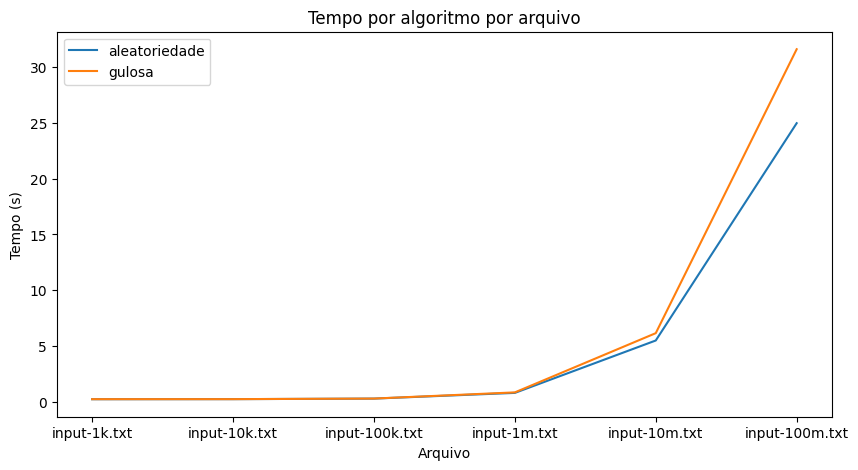

In [210]:
fig, ax = plt.subplots(figsize=(10, 5))
for algoritmo in df_mean['algoritmo'].unique():
    df_aux = df_mean[df_mean['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

Vemos que a estratégia aleatória possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input.

Isso deve-se ao fato de que a estratégia gulosa percorre todos os filmes até completar a Maratona de Filmes, procurando filmes que possam ser colocados nela. Já a estratégia aleatória, ao invés de percorrer todos os filmes, escolhe aleatoriamente um filme que pode ser colocado na Maratona de Filmes e o insere.

- Criando o Dataset para o gráfico de Filmes na Mochila vs Input

In [204]:
df_mean_movies = df.drop(columns=['tempo','tentativa'])
df_mean_movies = df_mean_movies.groupby(['algoritmo', 'arquivo']).mean().reset_index()
df_mean_movies

,algoritmo,arquivo,memoria
0,aleatoriedade,input-100k.txt,23.0
1,aleatoriedade,input-100m.txt,23.0
2,aleatoriedade,input-10k.txt,22.5
3,aleatoriedade,input-10m.txt,23.0
4,aleatoriedade,input-1k.txt,20.9
5,aleatoriedade,input-1m.txt,23.1
6,gulosa,input-100k.txt,24.0
7,gulosa,input-100m.txt,24.0
8,gulosa,input-10k.txt,24.0
9,gulosa,input-10m.txt,24.0


In [207]:
order_arquivos = list(data['gulosa'].keys())

df_mean_movies['arquivo'] = pd.Categorical(df_mean_movies['arquivo'], categories=order_arquivos, ordered=True)
df_mean_movies = df_mean_movies.sort_values(by=['arquivo'])
df_mean_movies

,algoritmo,arquivo,memoria
4,aleatoriedade,input-1k.txt,20.9
10,gulosa,input-1k.txt,22.0
2,aleatoriedade,input-10k.txt,22.5
8,gulosa,input-10k.txt,24.0
0,aleatoriedade,input-100k.txt,23.0
6,gulosa,input-100k.txt,24.0
5,aleatoriedade,input-1m.txt,23.1
11,gulosa,input-1m.txt,24.0
3,aleatoriedade,input-10m.txt,23.0
9,gulosa,input-10m.txt,24.0


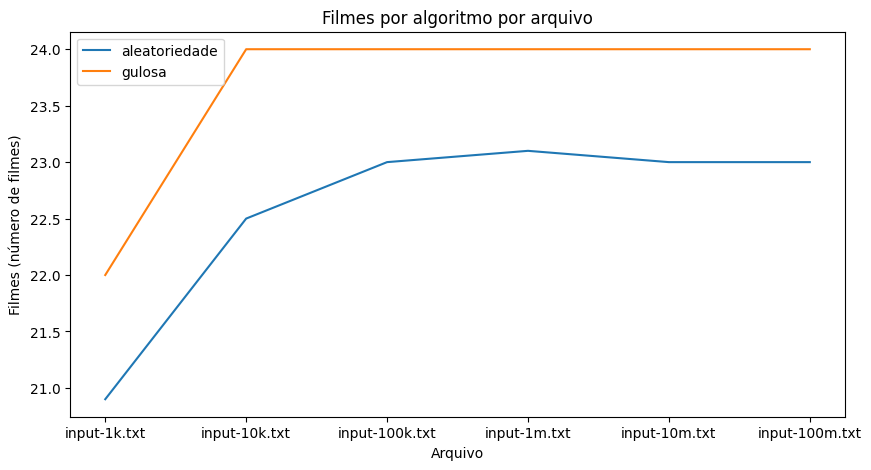

In [213]:
fig, ax = plt.subplots(figsize=(10, 5))

for algoritmo in df_mean_movies['algoritmo'].unique():
    df_aux = df_mean_movies[df_mean_movies['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['memoria'], label=algoritmo)

ax.set_title('Filmes por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Filmes (número de filmes)')
ax.legend()
plt.show()


Já no gráfico de Filmes na Mochila vs Input, vemos que a estratégia gulosa possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input. Isso deve-se ao fato de que a estratégia gulosa percorre todos os filmes até completar a Maratona de Filmes, procurando filmes que possam ser colocados nela. Já a estratégia aleatória, ao invés de percorrer todos os filmes, escolhe aleatoriamente um filme que pode ser colocado na Maratona de Filmes e o insere no bitset.

## Comparando categorias

Além disso, é possível comparar a quantidade de filmes por categoria que foram colocados na Maratona de Filmes.

Neste caso, serão utilizados 10000 filmes variando a quantidade de categorias de 1,2,3,4,5 e 10,20,30,50 e 100.

- **input-10k-1.txt**: contém 10000 filmes e 1 categoria.
- **input-10k-2.txt**: contém 10000 filmes e 2 categorias.
- **input-10k-3.txt**: contém 10000 filmes e 3 categorias.
- **input-10k-4.txt**: contém 10000 filmes e 4 categorias.
- **input-10k-5.txt**: contém 10000 filmes e 5 categorias.
- **input-10k-10.txt**: contém 10000 filmes e 10 categorias.
- **input-10k-20.txt**: contém 10000 filmes e 20 categorias.
- **input-10k-30.txt**: contém 10000 filmes e 30 categorias.
- **input-10k-50.txt**: contém 10000 filmes e 50 categorias.
- **input-10k-100.txt**: contém 10000 filmes e 100 categorias.

In [273]:
data_categoria = {
    'gulosa' : {
        'input-10k-1.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-2.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-3.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-4.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-5.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-10.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-20.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-30.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-50.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-75.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-100.txt': {
            'temmpo': 0,
            'categoria': 0
        },
    },
    'aleatoriedade': {
        'input-10k-1.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-2.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-3.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-4.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-5.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-10.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-20.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-30.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-50.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-75.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-100.txt': {
            'temmpo': 0,
            'categoria': 0
        },
    }
}

In [274]:
for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        output_name = algoritmo + '_output_categoria_' + arquivo.split('-')[2]
        start_time = time.time()
        !./{algoritmo} < inputs/{arquivo} > outputs/{output_name}
        end_time = time.time() - start_time
        print('\tTime:', end_time)
        data_categoria[algoritmo][arquivo]['tempo'] = end_time
        data_categoria[algoritmo][arquivo]['memoria'] = number_of_movies(f'outputs/{output_name}')

	Time: 0.23081111907958984
	Time: 0.23021650314331055
	Time: 0.2306652069091797
	Time: 0.23264408111572266
	Time: 0.23280858993530273
	Time: 0.22809553146362305
	Time: 0.23069334030151367
	Time: 0.23099589347839355
	Time: 0.22992300987243652
	Time: 0.2317509651184082
	Time: 0.22873210906982422
	Time: 0.22803807258605957
	Time: 0.2304084300994873
	Time: 0.22916650772094727
	Time: 0.22939085960388184
	Time: 0.22791814804077148
	Time: 0.22994780540466309
	Time: 0.22909879684448242
	Time: 0.22878527641296387
	Time: 0.22864389419555664
	Time: 0.22786593437194824
	Time: 0.22889447212219238


In [275]:
df_categoria = pd.DataFrame(columns=['algoritmo', 'arquivo', 'categoria', 'tempo', 'memoria'])

for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        df_categoria = pd.concat([df_categoria, pd.DataFrame({
            'algoritmo': [algoritmo],
            'arquivo': [arquivo],
            'categoria': [int(arquivo.split('-')[2].split('.')[0])],
            'tempo': [data_categoria[algoritmo][arquivo]['tempo']],
            'memoria': [data_categoria[algoritmo][arquivo]['memoria']]
        })])

df_categoria

,algoritmo,arquivo,categoria,tempo,memoria
0,gulosa,input-10k-1.txt,1,0.230811,1
0,gulosa,input-10k-2.txt,2,0.230217,2
0,gulosa,input-10k-3.txt,3,0.230665,6
0,gulosa,input-10k-4.txt,4,0.232644,11
0,gulosa,input-10k-5.txt,5,0.232809,15
0,gulosa,input-10k-10.txt,10,0.228096,24
0,gulosa,input-10k-20.txt,20,0.230693,24
0,gulosa,input-10k-30.txt,30,0.230996,24
0,gulosa,input-10k-50.txt,50,0.229923,24
0,gulosa,input-10k-75.txt,75,0.231751,24


- Criando o Dataset para o gráfico de Tempo vs Categorias

In [277]:
df_categoria_mean = df_categoria.drop(columns=['memoria'])
df_categoria_mean = df_categoria_mean.groupby(['algoritmo', 'arquivo', 'categoria']).mean().reset_index()
df_categoria_mean = df_categoria_mean.sort_values(by=['algoritmo','categoria'])
df_categoria_mean

,algoritmo,arquivo,categoria,tempo
0,aleatoriedade,input-10k-1.txt,1,0.228038
3,aleatoriedade,input-10k-2.txt,2,0.230408
5,aleatoriedade,input-10k-3.txt,3,0.229167
7,aleatoriedade,input-10k-4.txt,4,0.229391
8,aleatoriedade,input-10k-5.txt,5,0.227918
1,aleatoriedade,input-10k-10.txt,10,0.229948
4,aleatoriedade,input-10k-20.txt,20,0.229099
6,aleatoriedade,input-10k-30.txt,30,0.228785
9,aleatoriedade,input-10k-50.txt,50,0.228644
10,aleatoriedade,input-10k-75.txt,75,0.227866


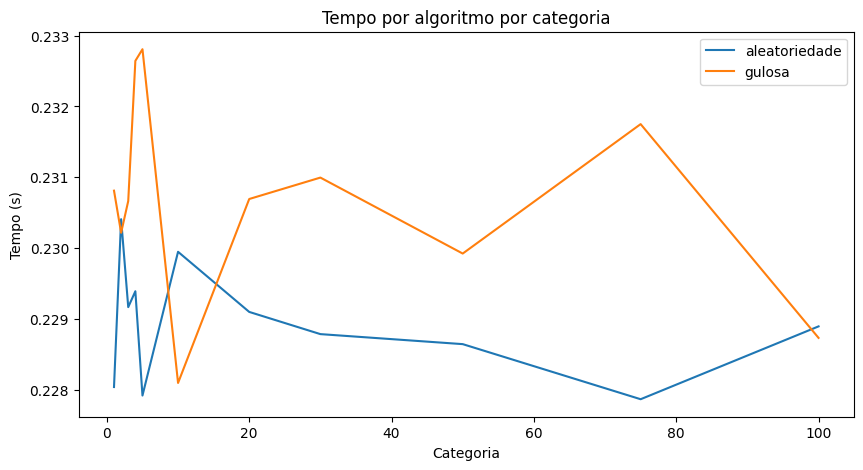

In [278]:
# plotar o tempo por categoria
fig, ax = plt.subplots(figsize=(10, 5))

for algoritmo in df_categoria_mean['algoritmo'].unique():
    df_aux = df_categoria_mean[df_categoria_mean['algoritmo'] == algoritmo]
    ax.plot(df_aux['categoria'], df_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

Ao tentar analisar o gráfico de Tempo vs Categorias, não se pode observar uma tendência clara, pois o tempo de execução é muito variável.

In [279]:
def get_all_filmes(arquivo):
    with open(arquivo, 'r') as f:
        lines = f.readlines()
        filmes = []
        for line in lines:
            line_split = line.split(' ')
            if len(line_split) < 4:
                continue
            filme = {
                'id': int(line_split[0]),
                'inicio': int(line_split[1]),
                'fim': int(line_split[2]),
                'categoria': int(line_split[3].split('\n')[0])
            }
            filmes.append(filme)
        return filmes

In [284]:
df_filmes = pd.DataFrame(columns=['id', 'inicio', 'fim', 'categoria', 'arquivo', 'algoritmo'])

for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        output_name = 'outputs/'+algoritmo + '_output_categoria_' + arquivo.split('-')[2]
        filmes = get_all_filmes(output_name)
        df_filmes = pd.concat([df_filmes, pd.DataFrame(filmes)])
        df_filmes['arquivo'] = arquivo
        df_filmes['algoritmo'] = algoritmo

In [287]:
df_filmes

,id,inicio,fim,categoria,arquivo,algoritmo
0,5058,0,0,1,input-10k-100.txt,aleatoriedade
0,249,0,0,2,input-10k-100.txt,aleatoriedade
1,7652,1,1,1,input-10k-100.txt,aleatoriedade
0,745,0,0,1,input-10k-100.txt,aleatoriedade
1,6509,1,1,1,input-10k-100.txt,aleatoriedade
...,...,...,...,...,...,...
16,535,18,19,23,input-10k-100.txt,aleatoriedade
17,3905,20,20,25,input-10k-100.txt,aleatoriedade
18,7154,21,21,96,input-10k-100.txt,aleatoriedade
19,6240,22,22,79,input-10k-100.txt,aleatoriedade


In [290]:
# fazer a contagemda quantidade de filmes por categoria
df_filmes_count = df_filmes.groupby(['algoritmo', 'arquivo', 'categoria']).count().reset_index()
df_filmes_count = df_filmes_count.sort_values(by=['algoritmo','categoria'])
df_filmes_count

,algoritmo,arquivo,categoria,id,inicio,fim
0,aleatoriedade,input-10k-100.txt,1,33,33,33
1,aleatoriedade,input-10k-100.txt,2,31,31,31
2,aleatoriedade,input-10k-100.txt,3,24,24,24
3,aleatoriedade,input-10k-100.txt,4,10,10,10
4,aleatoriedade,input-10k-100.txt,5,23,23,23
...,...,...,...,...,...,...
62,aleatoriedade,input-10k-100.txt,91,1,1,1
63,aleatoriedade,input-10k-100.txt,94,1,1,1
64,aleatoriedade,input-10k-100.txt,96,2,2,2
65,aleatoriedade,input-10k-100.txt,98,2,2,2


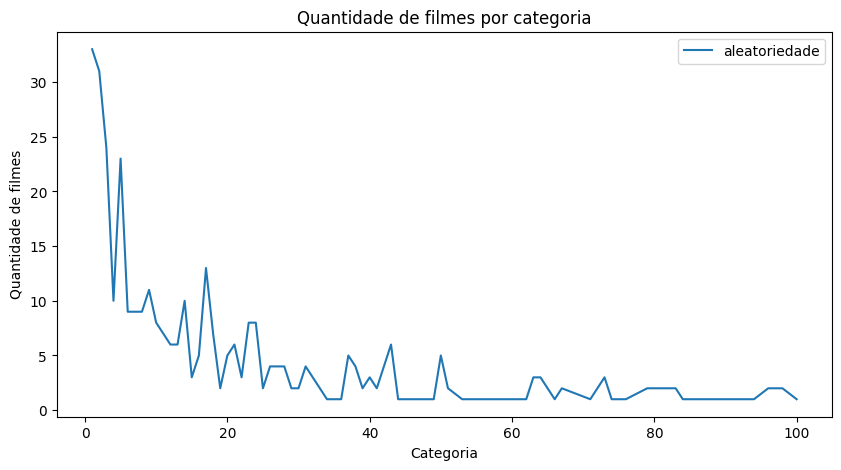

In [291]:
# grafico de filmes por categoria
fig, ax = plt.subplots(figsize=(10, 5))

for algoritmo in df_filmes_count['algoritmo'].unique():
    df_aux = df_filmes_count[df_filmes_count['algoritmo'] == algoritmo]
    ax.plot(df_aux['categoria'], df_aux['id'], label=algoritmo)

ax.set_title('Quantidade de filmes por categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade de filmes')
ax.legend()
plt.show()

## Conclusões

Podemos conferir que, a partir destes resultados, não basta apenas escolher um algoritmo para resolver um problema, mas sim, analisar o cenário e escolher o algoritmo que melhor se encaixa.

Caso o problema seja assistir a maior quantidade de filmes, no caso da Maratona de Filmes, podemos utilizar algoritmos como o guloso, e que possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input.

Caso o problema seja a otimização do tempo do algoritmo, podemos utilizar algoritmos como o aleatório, e que possui uma vantagem maior quando temos um cenário de mais fimes.

Além disso, com estes dados, conseguimos comparar o balanceamento de duas abordagens distintas: exploitation e exploration. No exploitation, o foco é dado a uma única propriedade determinística, que leva a soluções consistentes, porém, pode demandar mais tempo, neste caso. Por outro lado, no exploration, há liberdade para escolhas aleatórias, o que pode levar a soluções mais otimizadas em relação ao tempo, porém, com uma consistência no preenchimento total da Maratona menor.